importar librerias para el tratamiento y la graficacion

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargar los datasets

In [99]:
DatosJuan1 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoJuan1L.csv")
DatosJuan2 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoJuan2L.csv")
DatosJuan3 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoJuan3L.csv")
DatosJuan4 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoJuan4L.csv")
DatosJuan5 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatosJuan5L.csv")
DatosDavid1 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatosDavid1L.csv")
DatosDavid2 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatosDavid2L.csv")
DatosUao1 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoUao1L.csv")
DatosUao2 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoUao2L.csv")
DatosUao3 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\DatoUao3L.csv")
DatosRadiacionD2020 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\David data\David_2020.csv")
DatosRadiacionD2019 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\David data\Davit_2019.csv")
DatosRadiacionJ2020 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\Juandata\juan_2020.csv")
DatosRadiacionJ2019 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\Juandata\Juan_2019.csv")
DatosRadiacionU2021 = pd.read_csv(r"C:\Users\Mateo\Desktop\Data\Uaodata\Uao_2021.csv")





Dimensiones De los Data frames y informacion de sus variables

In [100]:
DatosDavid1.info()
DatosJuan1.info()
DatosUao1.info()
DatosRadiacionD2019.info()
DatosRadiacionD2020.info()
DatosRadiacionU2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3196 non-null   int64  
 1   Fecha y hora      3196 non-null   object 
 2    Temperatura (C)  3196 non-null   float64
 3    Humedad (%)      3196 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 100.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5437 non-null   int64  
 1   Fecha y hora      5437 non-null   object 
 2    Temperatura (C)  5437 non-null   float64
 3    Humedad (%)      5437 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 170.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 4 

In [101]:
import folium 
from folium.plugins import HeatMap

In [102]:
map = folium.Map()
map

Creamos unos vectores con las  cordenadas de cada punto de interes

In [103]:
CasaJuan = [3.3562204, -76.517550]
CasaDavid = [3.375889, -76.5143664]
Universidad = [3.353787, -76.521848]


In [104]:
def Agregarcordenadas(df,cordenadas):
    df['latitud'] = cordenadas[0]
    df['longitud'] = cordenadas[1]

Agregamos cordenadas a los datasets para poder crear los mapas de calor

In [105]:
Agregarcordenadas(DatosJuan1,CasaJuan)
Agregarcordenadas(DatosJuan2,CasaJuan)
Agregarcordenadas(DatosJuan3,CasaJuan)
Agregarcordenadas(DatosJuan4,CasaJuan)
Agregarcordenadas(DatosJuan5,CasaJuan)
Agregarcordenadas(DatosDavid1,CasaDavid)
Agregarcordenadas(DatosDavid2,CasaDavid)
Agregarcordenadas(DatosUao1,Universidad)
Agregarcordenadas(DatosUao2,Universidad)
Agregarcordenadas(DatosUao3,Universidad)
Agregarcordenadas(DatosRadiacionD2019,CasaDavid)
Agregarcordenadas(DatosRadiacionD2020,CasaDavid)
Agregarcordenadas(DatosRadiacionJ2019,CasaJuan)
Agregarcordenadas(DatosRadiacionJ2020,CasaJuan)
Agregarcordenadas(DatosRadiacionU2021,Universidad)



Creamos un mapa con zoom en una locacion especifica

In [106]:
mapJ = folium.Map(location = CasaJuan,
                 zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                 tiles="OpenStreetMap")

mapD = folium.Map(location = CasaDavid,
                    zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                    tiles="OpenStreetMap")
                    
mapU = folium.Map(location = Universidad,
                    zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                    tiles="OpenStreetMap")

mapJ

In [107]:
PromedioJ2020 = DatosRadiacionJ2020["GHI"].mean()
MaximaRJ2020 = DatosRadiacionJ2020["GHI"].max()
LugarMRJ2020 = DatosRadiacionJ2020["GHI"].idxmax()
HoraMRJ2020 = DatosRadiacionJ2020.iloc[LugarMRJ2020][4]

def HoraDeLaRadiacionMaxima(df):
    LugarMR = df["GHI"].idxmax()
    HoraMR = df.iloc[LugarMR][4]
    return HoraMR

def MaximaR(df):
    MaximaR = df["GHI"].max()
    return MaximaR

def Promedio(df):
    Promedio = df["GHI"].mean()
    return Promedio

def MinimaR(df):
    MinimaR = df["GHI"].min()
    return MinimaR

def HoraDeLaRadiacionMinima(df):
    LugarMR = df["GHI"].idxmin()
    HoraMR = df.iloc[LugarMR][4]
    return HoraMR

def M500DMH(df,day,month):
    Mayoresmean = df[(df["GHI"] > 500) & (df["Day"] == day) & (df["Month"] == month) & (df["Hour"] == HoraDeLaRadiacionMaxima(df))]
    return Mayoresmean



In [108]:
D1JMHS = M500DMH(DatosRadiacionJ2020,1,1)
D1DMHS = M500DMH(DatosRadiacionD2020,1,1)
D1UMHS = M500DMH(DatosRadiacionU2021,1,1)
D1MHS = pd.concat([D1JMHS,D1DMHS,D1UMHS])
D1MHS.set_axis([1,2,3], axis=0)


,Unnamed: 0,Year,Month,Day,Hour,Minute,GHI,Cloud Type,Surface Albedo,latitud,longitud
1,12,2020,1,1,12,0,707,3,0.18,3.356220,-76.517550
2,12,2020,1,1,12,0,664,3,0.16,3.375889,-76.514366
3,12,2020,1,1,12,0,534,3,0.16,3.353787,-76.521848


In [109]:
D1MHS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 5 to 5
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3 non-null      int64  
 1   Year            3 non-null      int64  
 2   Month           3 non-null      int64  
 3   Day             3 non-null      int64  
 4   Hour            3 non-null      int64  
 5   Minute          3 non-null      int64  
 6   GHI             3 non-null      int64  
 7   Cloud Type      3 non-null      int64  
 8   Surface Albedo  3 non-null      float64
 9   latitud         3 non-null      float64
 10  longitud        3 non-null      float64
dtypes: float64(3), int64(8)
memory usage: 288.0 bytes


In [110]:
Dia1Data = list(zip(D1MHS["latitud"], D1MHS["longitud"]))#, D1DMHS["GHI"]))
hm_loc = HeatMap(Dia1Data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

mapU.add_child(hm_loc)
mapU
             


In [111]:
def Mayoresmean(df):
    Mayoresmean = df[df["GHI"] > 800]
    return Mayoresmean

M800 = Mayoresmean(DatosRadiacionJ2020)



In [112]:
def M500DM(df,day,month):
    Mayoresmean = df[(df["GHI"] > 500) & (df["Day"] == day) & (df["Month"] == month)]
    return Mayoresmean
M500DM(DatosRadiacionJ2020,1,1)



,Unnamed: 0,Year,Month,Day,Hour,Minute,GHI,Cloud Type,Surface Albedo,latitud,longitud
2,9,2020,1,1,9,0,573,0,0.18,3.35622,-76.51755
3,10,2020,1,1,10,0,746,0,0.18,3.35622,-76.51755
4,11,2020,1,1,11,0,867,1,0.18,3.35622,-76.51755
5,12,2020,1,1,12,0,707,3,0.18,3.35622,-76.51755
6,13,2020,1,1,13,0,628,3,0.18,3.35622,-76.51755
7,14,2020,1,1,14,0,530,3,0.18,3.35622,-76.51755


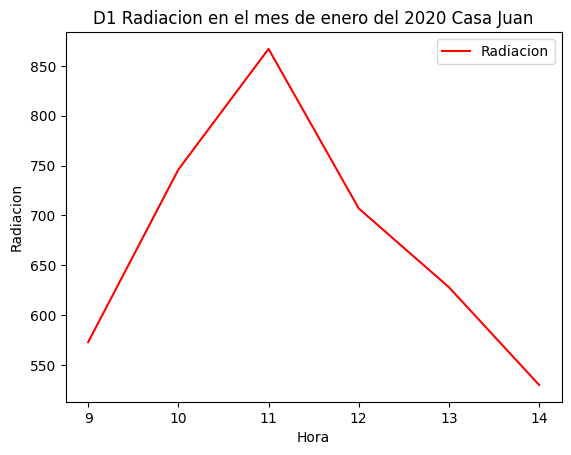

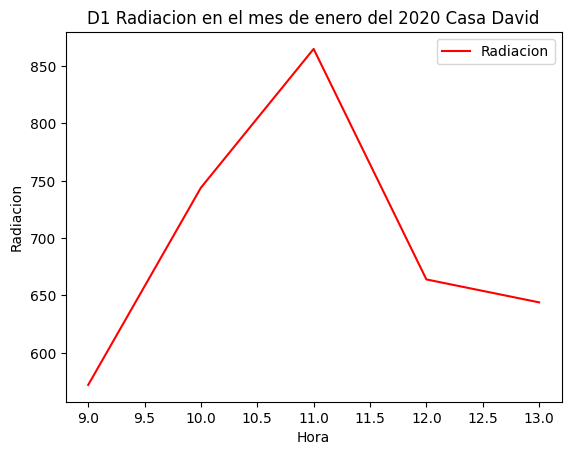

In [113]:
Horasm500J1_1 = M500DM(DatosRadiacionJ2020,1,1)
x = Horasm500J1_1["Hour"]
y = Horasm500J1_1["GHI"]
plt.plot(x,y , color = "red", label = "Radiacion"), plt.legend( loc = "upper right", fontsize = 10), plt.title("D1 Radiacion en el mes de enero del 2020 Casa Juan"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.show()

Horasm500D1_1 = M500DM(DatosRadiacionD2020,1,1)
x = Horasm500D1_1["Hour"]
y = Horasm500D1_1["GHI"]
plt.plot(x,y , color = "red", label = "Radiacion"), plt.legend( loc = "upper right", fontsize = 10), plt.title("D1 Radiacion en el mes de enero del 2020 Casa David"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.show()

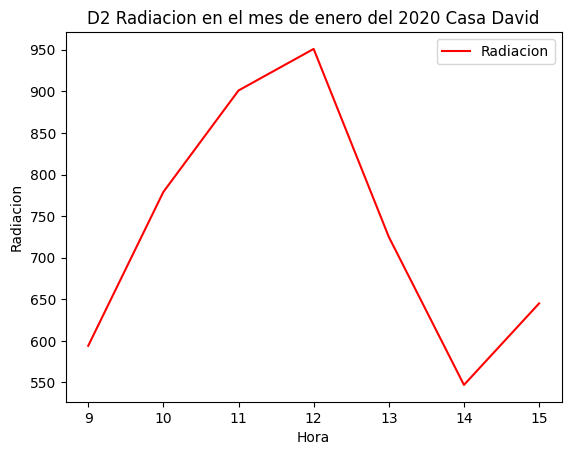

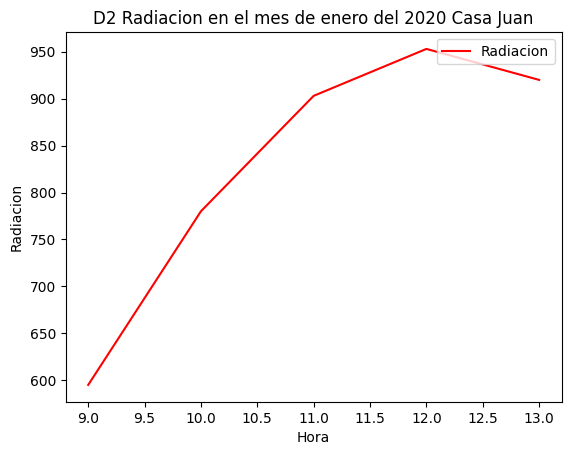

In [114]:
Horasm500D2_1 = M500DM(DatosRadiacionD2020,2,1)
x = Horasm500D2_1["Hour"]
y = Horasm500D2_1["GHI"]
plt.plot(x,y , color = "red", label = "Radiacion"), plt.legend( loc = "upper right", fontsize = 10), plt.title("D2 Radiacion en el mes de enero del 2020 Casa David"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.show()
Horasm500J2_1 = M500DM(DatosRadiacionJ2020,2,1)
x = Horasm500J2_1["Hour"]
y = Horasm500J2_1["GHI"]
plt.plot(x,y , color = "red", label = "Radiacion"), plt.legend( loc = "upper right", fontsize = 10), plt.title("D2 Radiacion en el mes de enero del 2020 Casa Juan"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.show()


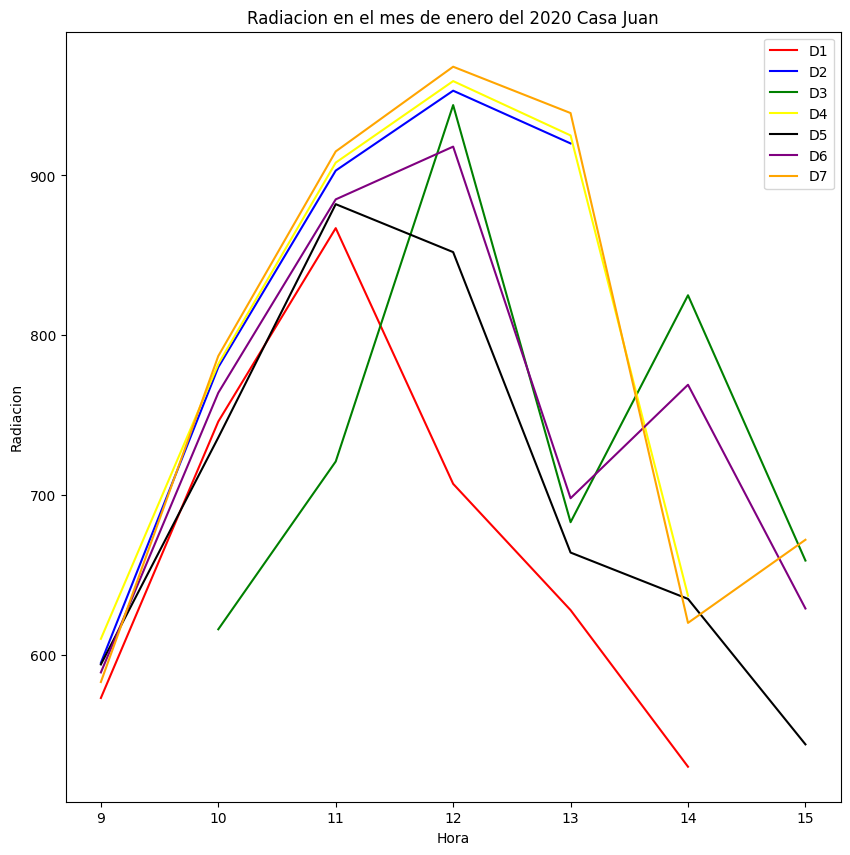

In [115]:
Horasm500J3_1 = M500DM(DatosRadiacionD2020,3,1)
Horasm500J4_1 = M500DM(DatosRadiacionD2020,4,1)
Horasm500J5_1 = M500DM(DatosRadiacionD2020,5,1)
Horasm500J6_1 = M500DM(DatosRadiacionD2020,6,1)
Horasm500J7_1 = M500DM(DatosRadiacionD2020,7,1)
Horasm500J8_1 = M500DM(DatosRadiacionD2020,8,1)
Horasm500J9_1 = M500DM(DatosRadiacionD2020,9,1)
Horasm500J10_1 = M500DM(DatosRadiacionD2020,10,1)

x = Horasm500J1_1["Hour"]
y = Horasm500J1_1["GHI"]

x2 = Horasm500J2_1["Hour"]
y2 = Horasm500J2_1["GHI"]

x3 = Horasm500J3_1["Hour"]
y3 = Horasm500J3_1["GHI"]

x4 = Horasm500J4_1["Hour"]
y4 = Horasm500J4_1["GHI"]

x5 = Horasm500J5_1["Hour"]
y5 = Horasm500J5_1["GHI"]

x6 = Horasm500J6_1["Hour"]
y6 = Horasm500J6_1["GHI"]

x7 = Horasm500J7_1["Hour"]
y7 = Horasm500J7_1["GHI"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x,y , color = "red", label = "D1"), ax.plot(x2,y2 , color = "blue", label = "D2"), ax.plot(x3,y3 , color = "green", label = "D3"), ax.plot(x4,y4 , color = "yellow", label = "D4"), ax.plot(x5,y5 , color = "black", label = "D5"), ax.plot(x6,y6 , color = "purple", label = "D6"), ax.plot(x7,y7 , color = "orange", label = "D7"), plt.legend( loc = "upper right", fontsize = 10), plt.title("Radiacion en el mes de enero del 2020 Casa Juan"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.show()








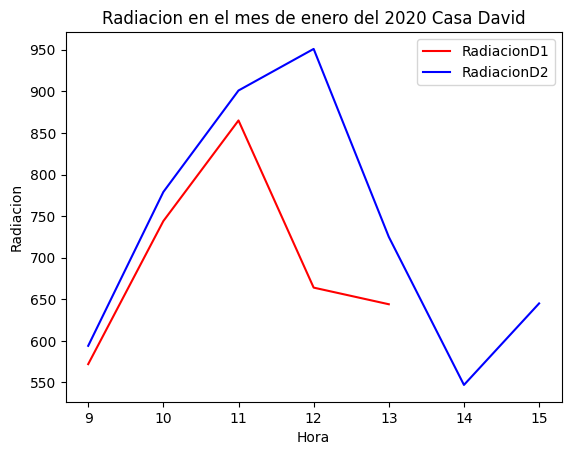

In [116]:
x = Horasm500D1_1["Hour"]
y = Horasm500D1_1["GHI"]
x1 = Horasm500D2_1["Hour"]
y2 = Horasm500D2_1["GHI"]
fig = plt.figure()
plt.plot(x,y , color = "red", label = "RadiacionD1"), plt.legend( loc = "upper right", fontsize = 10), plt.title("Radiacion en el mes de enero del 2020 Casa David"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.plot(x1,y2 , color = "blue", label = "RadiacionD2"), plt.legend( loc = "upper right", fontsize = 10)
plt.show()

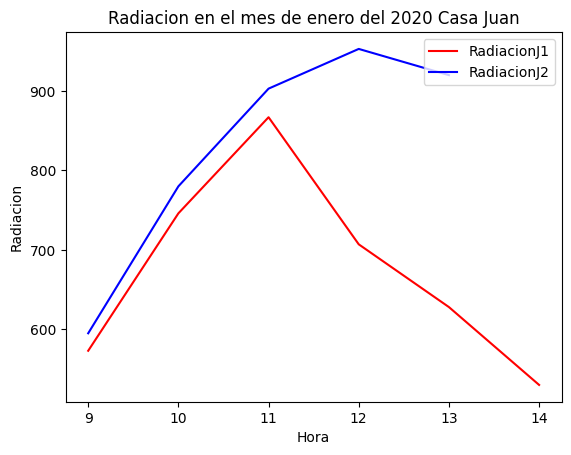

In [117]:
x = Horasm500J1_1["Hour"]
y = Horasm500J1_1["GHI"]
x1 = Horasm500J2_1["Hour"]
y2 = Horasm500J2_1["GHI"]

fig = plt.figure()
plt.plot(x,y , color = "red", label = "RadiacionJ1"), plt.legend( loc = "upper right", fontsize = 10), plt.title("Radiacion en el mes de enero del 2020 Casa Juan"), plt.xlabel("Hora"), plt.ylabel("Radiacion")
plt.plot(x1,y2 , color = "blue", label = "RadiacionJ2"), plt.legend( loc = "upper right", fontsize = 10)
plt.show()

In [119]:
#DatosJuan1["Fecha y hora"] = pd.to_datetime(DatosJuan1["Fecha y hora"])
DatosJuan1.astype(str)
DatosJuan1["Fecha y hora"].str.split(" ")



0        [22/10/2022, 6:44]
1        [22/10/2022, 6:44]
2        [22/10/2022, 6:44]
3        [22/10/2022, 6:44]
4        [22/10/2022, 6:44]
               ...         
5432    [22/10/2022, 15:47]
5433    [22/10/2022, 15:47]
5434    [22/10/2022, 15:47]
5435    [22/10/2022, 15:47]
5436    [22/10/2022, 15:47]
Name: Fecha y hora, Length: 5437, dtype: object